# Compare Exponent to Other

Here we compare exponent estimations to other methods.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_combined
from neurodsp.utils import set_random_seed

from bootstrap import bootstrap_corr

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.run import run_comparisons
from apm.plts import plot_dots
from apm.utils import format_corr, sampler

from apm.methods import specparam, hurst, dfa, higuchi_fd
from apm.methods import hjorth_activity, hjorth_mobility, hjorth_complexity, lempelziv
from apm.methods import sample_entropy, perm_entropy, app_entropy, spectral_entropy
from apm.methods.settings import HURST_PARAMS, DFA_PARAMS
from apm.methods.settings import AP_ENT_PARAMS, SA_ENT_PARAMS, PE_ENT_PARAMS, SP_ENT_PARAMS

from apm.sim.settings import FS, SIM_PARAMS_COMB

## Settings

In [3]:
# Define settings
f_range = [1, 50]
specparam_kwargs = {'min_peak_height' : 0.05, 'fs' : FS, 'f_range' : f_range}

In [4]:
# Set the random seed
set_random_seed(111)

In [5]:
# Notebook settings
SAVE_FIG = False

## Collect Methods

In [6]:
# Define ranges to sample parameters from
samplers = {'update_comb_exp' : sampler(np.arange(-2.5, 0.1, 0.1)),
            'update_pow' : sampler(np.arange(0, 1, 0.1)),
            'update_freq' : sampler(np.arange(5, 35, 1))}

In [7]:
# Define measures to apply
measures = {specparam : specparam_kwargs,
            hurst : HURST_PARAMS,
            dfa : DFA_PARAMS,
            hjorth_complexity : {}, 
            lempelziv : {},
            higuchi_fd : {},
            app_entropy : AP_ENT_PARAMS,
            perm_entropy : PE_ENT_PARAMS,
            sample_entropy : SA_ENT_PARAMS,
            spectral_entropy : SP_ENT_PARAMS}

## Run Simulations

In [8]:
N_SIMS = 1000

In [9]:
# Run simulations
outputs = run_comparisons(sim_combined, SIM_PARAMS_COMB, measures, samplers, n_sims=N_SIMS)

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/antropy/entropy.py:249: RuntimeWarning: divide by zero encountered in log2
  se = -(psd_norm * np.log2(psd_norm)).sum(axis=axis)
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/antropy/entropy.py:249: RuntimeWarning: invalid value encountered in multiply
  se = -(psd_norm * np.log2(psd_norm)).sum(axis=axis)
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/antropy/entropy.py:249: RuntimeWarning: divide by zero encountered in log2
  se = -(psd_norm * np.log2(psd_norm)).sum(axis=axis)
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/antropy/entropy.py:249: RuntimeWarning: invalid value encountered in multiply
  se = -(psd_norm * np.log2(psd_norm)).sum(axis=axis)
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/antropy/entropy.py:249: RuntimeWarning: divide by zero encountered in log2
  se = -(psd_norm * np.log2(psd_norm)).sum(axis=axis)
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/antropy/entropy.py:249: Runtime

## Exponent to Fluctuations

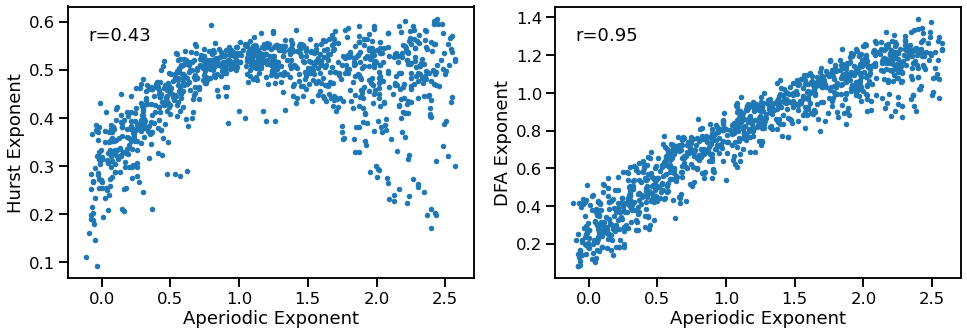

In [10]:
# Plot comparisons
_, axes = plt.subplots(1, 2, figsize=[16, 5])
plot_dots(outputs['specparam'], outputs['hurst'], tposition='tl',
          xlabel='Aperiodic Exponent', ylabel='Hurst Exponent', ax=axes[0])
plot_dots(outputs['specparam'], outputs['dfa'], tposition='tl',
          xlabel='Aperiodic Exponent', ylabel='DFA Exponent', ax=axes[1])

In [11]:
# Compute bootstrapped correlations
corrs_hst = bootstrap_corr(outputs['specparam'], outputs['hurst'])
corrs_dfa = bootstrap_corr(outputs['specparam'], outputs['dfa'])

In [12]:
print('Correlations:')
print('  EXP & HST:  ', format_corr(*corrs_hst))
print('  EXP & DFA:  ', format_corr(*corrs_dfa))

Correlations:
  EXP & HST:   r=+0.435  CI[+0.371, +0.499],  p=0.000
  EXP & DFA:   r=+0.951  CI[+0.943, +0.957],  p=0.000


## Exponent to Complexity

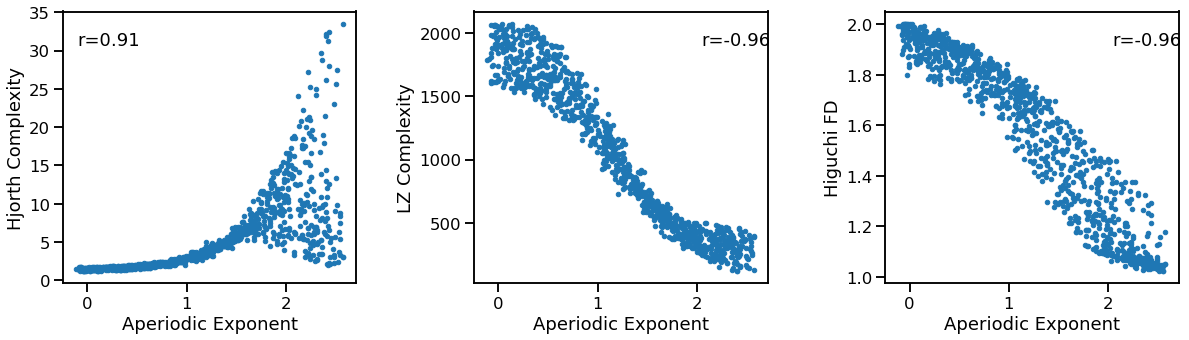

In [13]:
# Plot comparisons
_, axes = plt.subplots(1, 3, figsize=[20, 5])
plot_dots(outputs['specparam'], outputs['hjorth_complexity'], tposition='tl',
          xlabel='Aperiodic Exponent', ylabel='Hjorth Complexity', ax=axes[0])
plot_dots(outputs['specparam'], outputs['lempelziv'],
          xlabel='Aperiodic Exponent', ylabel='LZ Complexity', ax=axes[1])
plot_dots(outputs['specparam'], outputs['higuchi_fd'],
          xlabel='Aperiodic Exponent', ylabel='Higuchi FD', ax=axes[2])
plt.subplots_adjust(wspace=0.4)

In [14]:
# Compute bootstrapped correlations
corrs_hjo = bootstrap_corr(outputs['specparam'], outputs['hjorth_complexity'])
corrs_lzc = bootstrap_corr(outputs['specparam'], outputs['lempelziv'])
corrs_hfd = bootstrap_corr(outputs['specparam'], outputs['higuchi_fd'])

In [15]:
print('Correlations:')
print('  EXP & HJO:  ', format_corr(*corrs_hjo))
print('  EXP & LZC:  ', format_corr(*corrs_lzc))
print('  EXP & HFD:  ', format_corr(*corrs_hfd))

Correlations:
  EXP & HJO:   r=+0.910  CI[+0.889, +0.927],  p=0.000
  EXP & LZC:   r=-0.962  CI[-0.967, -0.955],  p=0.000
  EXP & HFD:   r=-0.957  CI[-0.961, -0.952],  p=0.000


## Exponent to Entropy

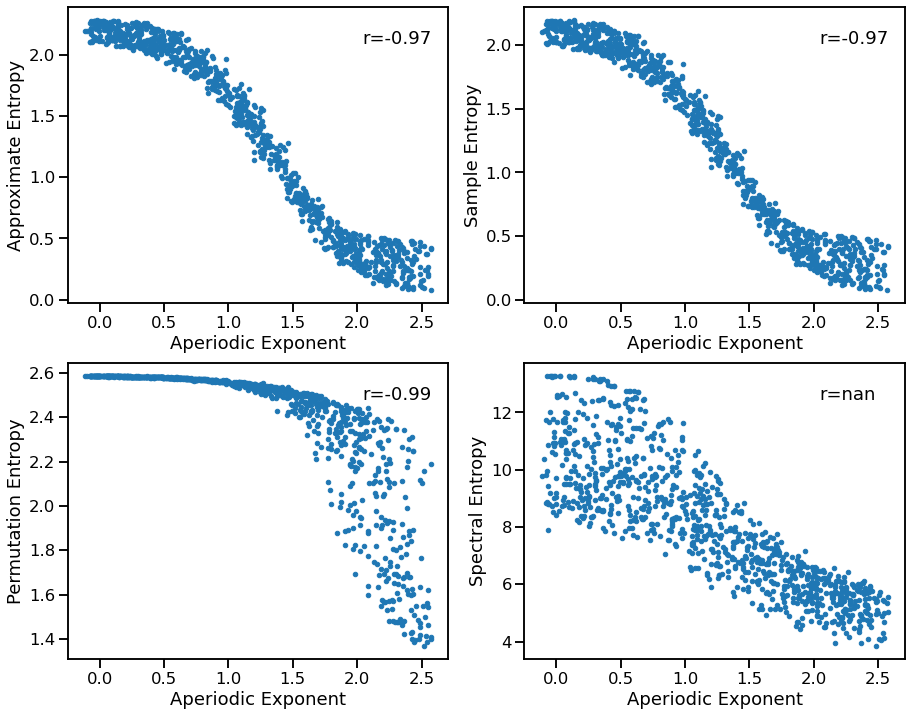

In [16]:
# Plot comparisons
_, axes = plt.subplots(2, 2, figsize=[15, 12])
plot_dots(outputs['specparam'], outputs['app_entropy'],
          xlabel='Aperiodic Exponent', ylabel='Approximate Entropy', ax=axes[0, 0])
plot_dots(outputs['specparam'], outputs['perm_entropy'],
          xlabel='Aperiodic Exponent', ylabel='Permutation Entropy', ax=axes[1, 0])
plot_dots(outputs['specparam'], outputs['sample_entropy'],
          xlabel='Aperiodic Exponent', ylabel='Sample Entropy', ax=axes[0, 1])
plot_dots(outputs['specparam'], outputs['spectral_entropy'],
          xlabel='Aperiodic Exponent', ylabel='Spectral Entropy', ax=axes[1, 1])

In [17]:
# Compute bootstrapped correlations
corrs_appr = bootstrap_corr(outputs['specparam'], outputs['app_entropy'])
corrs_perm = bootstrap_corr(outputs['specparam'], outputs['perm_entropy'])
corrs_samp = bootstrap_corr(outputs['specparam'], outputs['sample_entropy'])
corrs_spct = bootstrap_corr(outputs['specparam'], outputs['spectral_entropy'])

In [18]:
print('Correlations:')
print('  EXP & APPR:  ', format_corr(*corrs_appr))
print('  EXP & PERM:  ', format_corr(*corrs_perm))
print('  EXP & SAMP:  ', format_corr(*corrs_samp))
print('  EXP & SPCT:  ', format_corr(*corrs_spct))

Correlations:
  EXP & APPR:   r=-0.974  CI[-0.977, -0.969],  p=0.000
  EXP & PERM:   r=-0.986  CI[-0.989, -0.983],  p=0.000
  EXP & SAMP:   r=-0.973  CI[-0.977, -0.968],  p=0.000
  EXP & SPCT:   r=+nan  CI[+nan, +nan],  p=nan


## Conclusions

Words, words, words.